In [1]:
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# plt.rc('font', family='Times New Roman')
import matplotlib 

plt.rcParams['font.sans-serif'] = ['SimHei']
# mpl.rcParams['axes.unicode_minus'] = False


In [2]:
with open('decision.txt', 'r') as f:
    print('文件的编码格式:'+f.encoding)
    txt = f.read()
    words = jieba.lcut(txt)
    
counts = {}     
for word in words:
     # == 1 单个词语不计算在内
    if  len(word) < 2 :  
        continue
    else:
        # 遍历所有词语，每出现一次其对应的值加 1
        counts[word] = counts.get(word, 0) + 1

refined_word = []
for word in words:
    if  len(word) < 2 :  
        continue
    else:
        refined_word.append(word)
        
#将键值对转换成列表
items = list(counts.items())

# 根据词语出现的次数进行从大到小排序
items.sort(key=lambda x: x[1], reverse=True)
#列标题 format
print("{0:<5}{1:<8}{2:<5}".format('序号','词语', '频率'))
#需要显示的范围  10即显示前10个，0到9

    



Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache


文件的编码格式:UTF-8


Loading model cost 0.528 seconds.
Prefix dict has been built successfully.


序号   词语      频率   


In [3]:
for i in range(10):
    word, count = items[i]
    print("{0:<5}{1:<8}{2:>5}".format(i+1,word, count))

1    发展        207
2    中国        187
3    人民        168
4    坚持        157
5    社会主义      156
6    建设        153
7    国家         92
8    全面         87
9    领导         86
10   推进         84


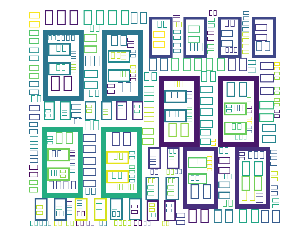

In [4]:
chiyun = [] 
for w,c in items:
    chiyun.append(w)
    
text_cut  =  '/'.join(chiyun)

wordcloud = WordCloud(background_color='white', width=1000, height=860, margin=2).generate(text_cut)
# 显示图片 
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [5]:
refined_word[:10]

['中共中央', '关于', '百年', '奋斗', '重大成就', '历史', '经验', '决议', '2021', '11']

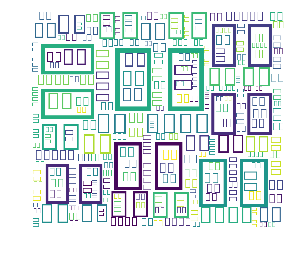

In [6]:
matplotlib.rc("font", family='Microsoft YaHei')

wordcloud = WordCloud(background_color='white', width=1000, height=860, margin=2).generate(u" ".join(refined_word))
# 显示图片 
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [7]:
from matplotlib.font_manager import FontManager
import subprocess

fm = FontManager()
mat_fonts = set(f.name for f in fm.ttflist)

output = subprocess.check_output(
    'fc-list :lang=zh -f "%{family}\n"', shell=True)
output = output.decode('utf-8')
# print '*' * 10, '系统可用的中文字体', '*' * 10
# print output
zh_fonts = set(f.split(',', 1)[0] for f in output.split('\n'))
available = mat_fonts & zh_fonts

print('*' * 10, '可用的字体', '*' * 10)
for f in available:
    print(f)

********** 可用的字体 **********
Droid Sans Fallback
Yahei Mono
SimHei
YouYuan
FangSong
YaHei Consolas Hybrid
Microsoft YaHei
LiSu
KaiTi
